## Question 2a.)

In [3]:
#importing data 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('mendota_secchi_depth.txt', delimiter='\t')
x = df['day_of_year']
y = df['secchi_depth']



def kernel_fit(sigma=10,lam=.01):

    # Kernel fitting to data
    n = np.shape(x)[0]
    # sigma = 10
    # lam = 0.01 #ridge regression parameter

    distsq = np.zeros((n,n),dtype=float)

    for i in range(0,n):
        for j in range(0,n):
            distsq[i,j]=(x[i]-x[j])**2

    K = np.exp(-distsq/(2*sigma**2))

    alpha = np.linalg.inv(K+lam*np.identity(n))@y


    # Generate smooth curve corresponding to data fit

    p = 365

    x_test = np.linspace(0,365,p)

    distsq_xtest = np.zeros((p,n),dtype=float)


    for i in range(0,p):
        for j in range(0,n):

            distsq_xtest[i,j] = (x_test[i]-x[j])**2      

    dtest = np.exp(-distsq_xtest/(2*sigma**2))@alpha


    fig, ax = plt.subplots(figsize = (11,6))
    ax.scatter(x,y,label='Measured data')
    ax.plot(x_test,dtest,'r',label='Kernel fit')
    ax.legend(loc='lower right')

    print("sigma = ", sigma)
    print("lambda = ", lam)
    plt.title('Data and Kernel Fit')
    plt.legend(loc='lower right')
    plt.xlabel('day of the year')
    plt.ylabel('depth of lake Mendota')
    plt.show()



## Question 2a.) Answer
the data is slightly underfit, however this might be best case if we want to generalize this model to other data sets.

sigma =  10
lambda =  0.01


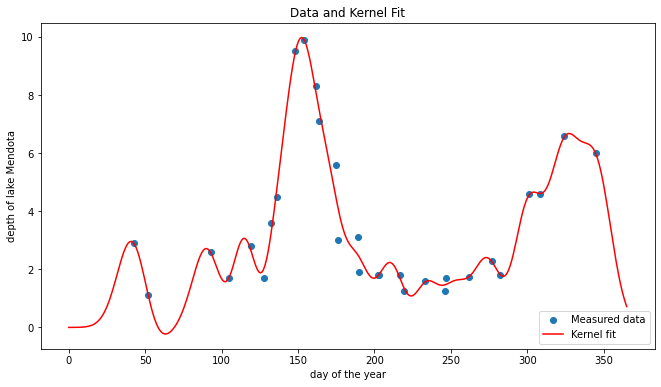

In [4]:
kernel_fit(10)

## here is a better fit of the data with slightly different sigma and lambda values

sigma =  5.5
lambda =  0.01


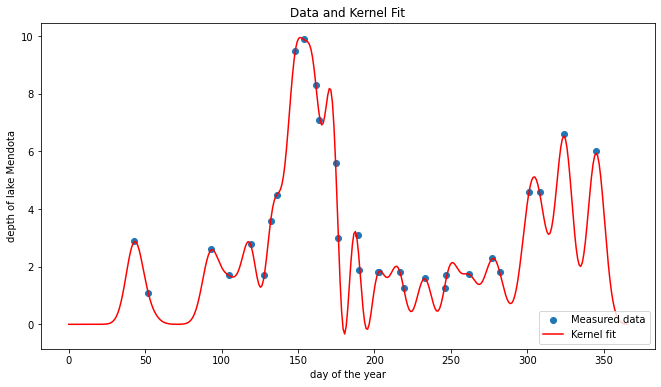

In [18]:
kernel_fit(5.5, .01)

## Question 2b.)

Describe how you could use k-fold cross validation to systematically find a goodvalue of σ and λ.



Split your dataset into k-folds.

Train your model on k-1 of the folds, with set σ and λ.

then use the rest of the data to evaluate the error. does this split and test for all the kfolds with tthe same σ and λ. take the average. repeat the process for the different combos of σ and λ then compare all the averages.

Finally, evaluate the performance of the model on a test set, using the chosen values of σ and λ.
